In [ ]:
import pandas as pd #gerekli kütüphaneleri ekliyorum
import numpy as np


In [ ]:
data = pd.read_csv("/content/covid_19_clean_complete.csv")

In [ ]:
data.head() # ilk 5 veri alınır

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
data.tail() #som 5 veri alınır

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
38884,NaN,Sao Tome and Principe,0.186360,6.613081,2020-06-18,688,12,191,485,Africa
38885,NaN,Yemen,15.552727,48.516388,2020-06-18,909,248,273,388,Eastern Mediterranean
38886,NaN,Comoros,-11.645500,43.333300,2020-06-18,210,5,129,76,Africa
38887,NaN,Tajikistan,38.861034,71.276093,2020-06-18,5279,51,3762,1466,Europe
38888,NaN,Lesotho,-29.609988,28.233608,2020-06-18,4,0,2,2,Africa


In [ ]:
data.shape #veri setimizdeki kolon- satır bilgilerini verir

(38889, 10)

In [ ]:
data.info() #veri setimizdeki kolon bilgilerini verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11622 non-null  object 
 1   Country/Region  38889 non-null  object 
 2   Lat             38889 non-null  float64
 3   Long            38889 non-null  float64
 4   Date            38889 non-null  object 
 5   Confirmed       38889 non-null  int64  
 6   Deaths          38889 non-null  int64  
 7   Recovered       38889 non-null  int64  
 8   Active          38889 non-null  int64  
 9   WHO Region      38889 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [ ]:
data.columns #kolon isimlerini dizi halinde döndürür

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
data.describe() #sayısal kolonların standart sapma ortalama gibi değerleri hesaplar

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,38889.000000,38889.000000,3.888900e+04,38889.000000,38889.000000,3.888900e+04
mean,21.362269,23.701848,9.020540e+03,560.147754,3402.299082,5.058093e+03
std,24.969887,70.158193,7.100308e+04,4543.654747,22340.891460,4.862819e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,-1.400000e+01
25%,7.540000,-15.310100,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.685000,21.758700,7.700000e+01,1.000000,9.000000,1.200000e+01
75%,41.204400,81.000000,8.840000e+02,12.000000,294.000000,3.170000e+02
max,71.706900,178.065000,2.191052e+06,118434.000000,599115.000000,1.473503e+06


In [ ]:
data.isnull().sum() #her sütun için toplamda kaç eksik değer(NaN) olduğunu hesaplar

Province/State    27267
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
data['Province/State'].unique() #bu kolondaki benzersiz değerleri döndürür.

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Mayotte', 'New Caledonia',
       'Reunion', 'Saint Barthelemy', 'St Martin', 'Martinique', 'Aruba',
       'Curacao', 'Sint Maarten', 'Bermud

In [ ]:
data['Province/State'].value_counts()

Australian Capital Territory    149
Yunnan                          149
Mayotte                         149
Guadeloupe                      149
French Polynesia                149
                               ... 
Guizhou                         149
Guangxi                         149
Guangdong                       149
Gansu                           149
Saint Pierre and Miquelon       149
Name: Province/State, Length: 78, dtype: int64

In [ ]:
data.drop(['Lat','Long'], axis = 1, inplace = True) #Enlem ve Boylam burada bizim için önemli özellikler değil

In [ ]:
data.head()

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,2020-01-22,0,0,0,0,Africa


In [ ]:
kumelenmıs_data = data.groupby('Country/Region').sum()

<ipython-input-20-03610c4b6da1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kumelenmıs_data = data.groupby('Country/Region').sum()


In [ ]:
kumelenmıs_data.head()

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
Afghanistan,646624,12976,87039,546609
Albania,71576,2422,47525,21629
Algeria,473539,39564,260772,173203
Andorra,60642,3395,37859,19388
Angola,4335,240,1314,2781


In [ ]:
kumelenmıs_data .shape #187 ülke 4 bilgi kolonumuz var

(187, 4)

In [ ]:
kumelenmıs_data.loc["China"]

Confirmed    10810346
Deaths         491331
Recovered     8603505
Active        1715510
Name: China, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

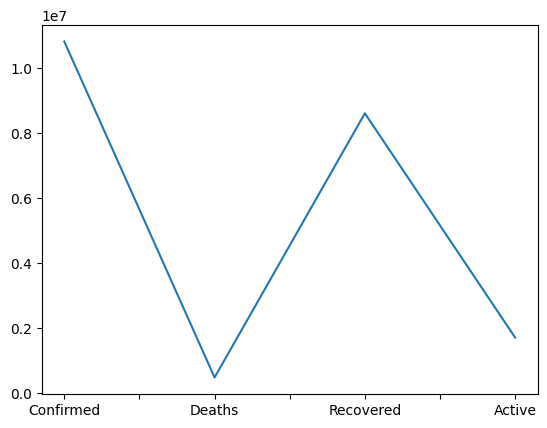

In [ ]:
kumelenmıs_data.loc['China'].plot()

<Axes: >

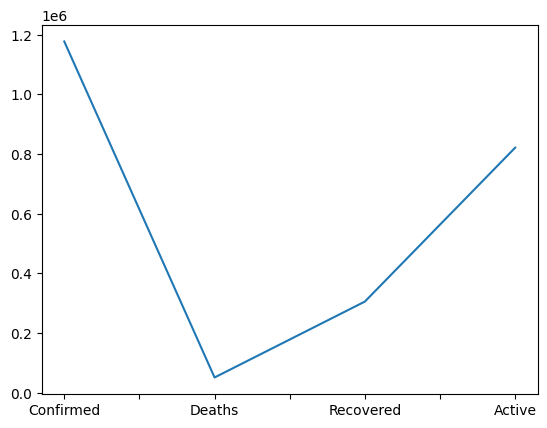

In [ ]:
kumelenmıs_data.loc['Egypt'].plot()

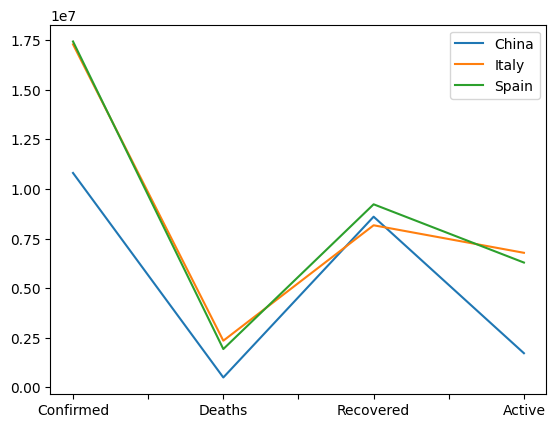

In [ ]:
kumelenmıs_data.loc['China'].plot()
kumelenmıs_data.loc['Italy'].plot()
kumelenmıs_data.loc['Spain'].plot()
plt.legend()